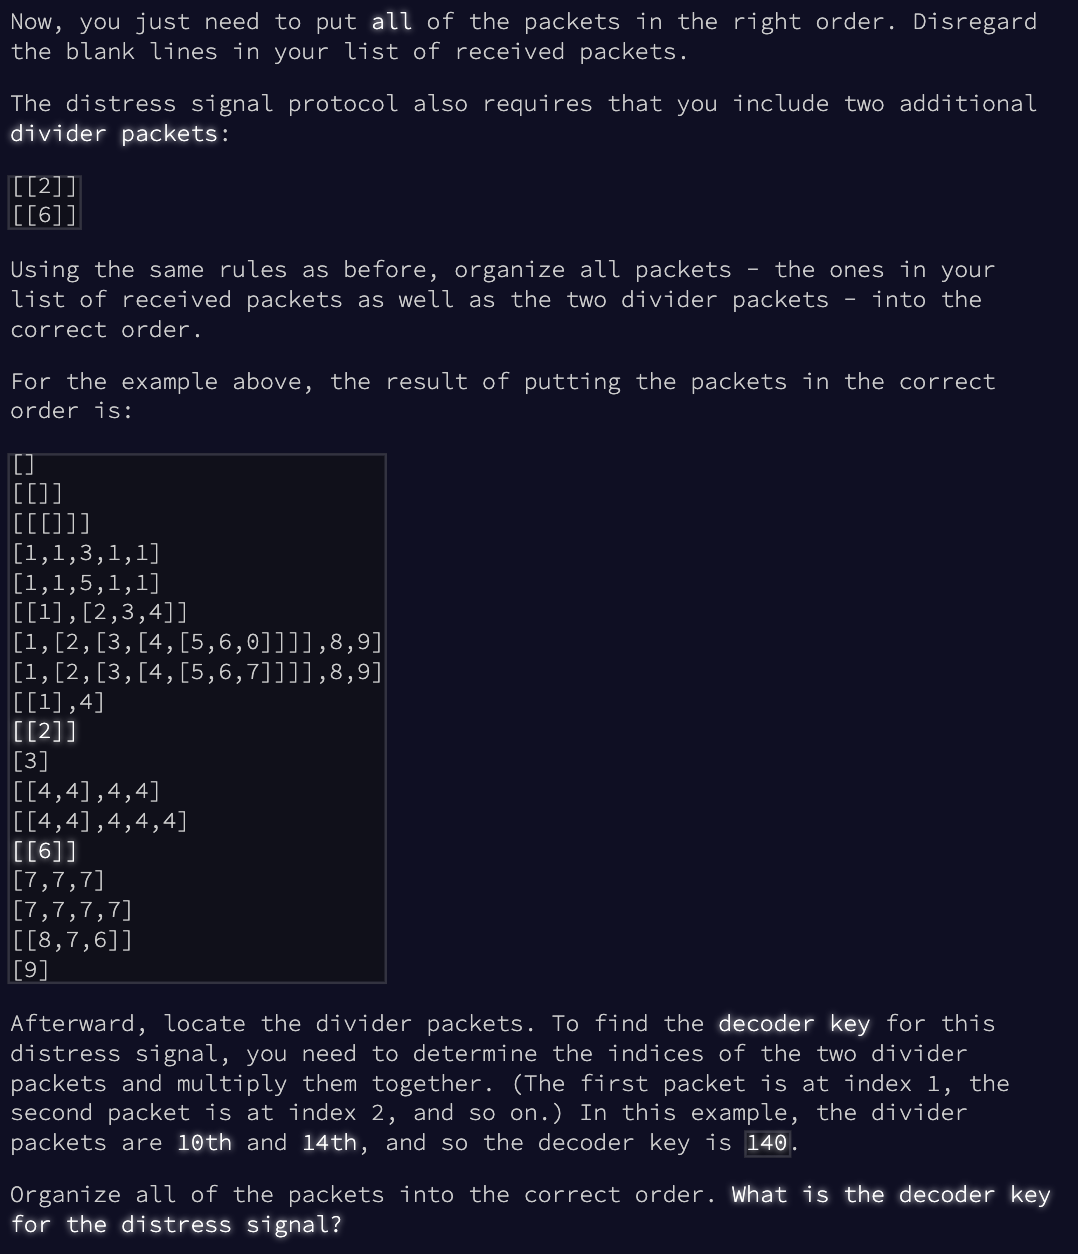

In [1]:
from IPython import display
display.Image("day13part2instructions.jpeg")

# testing on example input

### example input pairs + divider packets

In [2]:
l = [1,1,3,1,1]
r = [1,1,5,1,1]
pair_1 = [l,r]

l = [[1],[2,3,4]]
r = [[1],4]
pair_2 = [l,r]

l = [9]
r = [[8,7,6]]
pair_3 = [l,r]

l = [[4,4],4,4]
r = [[4,4],4,4,4]
pair_4 = [l,r]

l = [7,7,7,7]
r = [7,7,7]
pair_5 = [l,r]

l = []
r = [3]
pair_6 = [l,r]

l = [[[]]]
r = [[]]
pair_7 = [l,r]

l = [1,[2,[3,[4,[5,6,7]]]],8,9]
r = [1,[2,[3,[4,[5,6,0]]]],8,9]
pair_8 = [l,r]

l = [[2]]
r = [[6]]
pair_9 = [l,r]

In [3]:
all_pairs = [pair_1, pair_2, pair_3, pair_4, pair_5, pair_6, pair_7, pair_8, pair_9]

In [4]:
all_pairs

[[[1, 1, 3, 1, 1], [1, 1, 5, 1, 1]],
 [[[1], [2, 3, 4]], [[1], 4]],
 [[9], [[8, 7, 6]]],
 [[[4, 4], 4, 4], [[4, 4], 4, 4, 4]],
 [[7, 7, 7, 7], [7, 7, 7]],
 [[], [3]],
 [[[[]]], [[]]],
 [[1, [2, [3, [4, [5, 6, 7]]]], 8, 9], [1, [2, [3, [4, [5, 6, 0]]]], 8, 9]],
 [[[2]], [[6]]]]

### pair comparer function

In [5]:
from itertools import zip_longest as zip_long

In [6]:
# same 'packet_check' pair comparer function as part 1

def packet_check(pair): 
    
    compare_list = []
    
    def inner_check(pair):
        
        l = pair[0]
        r = pair[1]
        
        for li, ri in zip_long(l,r):
            if type(li) == int and type(ri) == int:
                if li < ri:
                    compare_list.append(True)
                    return True
                elif li > ri:
                    compare_list.append(False)
                    return False
                elif li == ri:
                    pass
            elif li == None:
                compare_list.append(True)
                return True
            elif ri == None:
                compare_list.append(False)
                return False      
            elif type(li) == list and type(ri) == list:
                inner_pair = (li,ri)
                inner_check(inner_pair)
            elif type(li) == int and type(ri) == list:
                li_to_list = []
                li_to_list.append(li)
                inner_pair = (li_to_list,ri)
                inner_check(inner_pair)
            elif type(li) == list and type(ri) == int:
                ri_to_list = []
                ri_to_list.append(ri)
                inner_pair = (li,ri_to_list)
                inner_check(inner_pair)
    inner_check(pair)
    
    if compare_list[0] == True:
        return True
    else:
        return False  

### using comparer function to put all packets in correct order

In [7]:
# ordering function

def order_packets(pairs):
    
    checked_lists = []
    stripped_list = []
    
    # iterate through pairs, appending packets of each pear one a time to 'stripped_list' 
    # this flattens the pairs from being grouped by 2 to a single list containing all packets ungrouped

    for pair in pairs:
        for packet in pair:
            stripped_list.append(packet)
    
    # append 'start' to 'checked_list'
    # append flat list of packets to 'checked_list'
    # this is because inner func will be called by while loop that compares last two items in 'checked_list',
    # and keep running until the last two items match (meaning the ordering is complete)
    # 'start' and first flattened list don't match, starting the function
    
    
    checked_lists.append(['start']) 
    checked_lists.append(stripped_list) 
    
    # ordering algorithm for list of all packets                              
    def inner_func(list_of_pairs): 
        paired = [list_of_pairs[n:n+2] for n in range(0, len(list_of_pairs), 2)] 
        # ^convert flattened list back to list of grouped pairs
        
        check_a = [] # result of first round checks will go here
        
        
        # iterate through each pair in the list:
        # calling 'packet_check' function on each pair, which tells if the pair is correctly ordered or not
        # if it's correctly ordered, add packets in same order to 'check_a'
        # if it's not correctly paired, add packets in reversed order to 'check_a'
        for pair in paired:
            if packet_check(pair) == True:
                check_a.append(pair[0])
                check_a.append(pair[1])
            else:
                check_a.append(pair[1])
                check_a.append(pair[0])
        checked_lists.append(check_a)
        
        # 'check_a' now contains flattened list of packets,
        # with each pair (0,1)(2,3)(4,5) etc. either kept or flipped into the correct order
        
        # hold first and last packet from 'checked_a'
        start_a = check_a[0]
        mid_a = check_a[1:-1]
        end_a = check_a[-1]

        # convert middle packets from 'checked_a' back to list of grouped pairs
        mid_a = [mid_a[n:n+2] for n in range(0, len(mid_a), 2)]
        

        check_mid_a = [] # result of second round of checks will go here
        
        # iterate through each pair list of middle packets from 'checked_a':
        # calling 'packet_check' function on each pair, which tells if the pair is correctly ordered or not
        # if it's correctly ordered, add packets in same order to 'check_mid_a'
        # if it's not correctly paired, add packets in reversed order to 'check_mid_a'
        for pair in mid_a:
            if packet_check(pair) == True:
                check_mid_a.append(pair[0])
                check_mid_a.append(pair[1])
            else:
                check_mid_a.append(pair[1])
                check_mid_a.append(pair[0])
        
        # 'check_b' now contains flattened list of packets from *middle* of previous check
        # with each pair (1,2)(3,4)(5,6) etc. *indices from previous check*  kept or flipped into correct order
        # (slicing first and last item off before second round of checks... 
        # ... ensured we didn't just needlessly compare the same pairs over again,
        # as they already were correctly ordered from the first of checks check!
        
        # attach first and last packet back on result of checked middle packets 
        check_b = [] 
        check_b.append(start_a)
        for packet in check_mid_a:
            check_b.append(packet)
        check_b.append(end_a)
        
        # now the list of packets has gone through the two rounds of checking and flipping pairs when needed
        # append this newly ordered list to 'checked_lists' 
        checked_lists.append(check_b)
     
    # while loop compares last two lists in 'checked_lists':
    # if they are equivalent, means last past through 'inner_func' ordering algorithm didn't flip any pairs
    # this means the ordering is complete, and the last list in 'checked_lists' is in order.
    # if they aren't equivalent, there is more ordering/pair flipping to be done,
    # pass last list in 'checked_lists' to 'inner_func' and continue loop.
    while checked_lists[-1] != checked_lists[-2]: 
        print('continuing sort')
        inner_func(checked_lists[-1])
    print('sorted')
    return checked_lists # return all the 'checked_lists'

In [8]:
# each 'continuing sort' means another call to the 'inner_func' ordering function

results = order_packets(all_pairs)

continuing sort
continuing sort
continuing sort
continuing sort
continuing sort
continuing sort
continuing sort
continuing sort
sorted


In [9]:
# final packet is completely sorted

sorted_packets = results[-1]
sorted_packets

[[],
 [[]],
 [[[]]],
 [1, 1, 3, 1, 1],
 [1, 1, 5, 1, 1],
 [[1], [2, 3, 4]],
 [1, [2, [3, [4, [5, 6, 0]]]], 8, 9],
 [1, [2, [3, [4, [5, 6, 7]]]], 8, 9],
 [[1], 4],
 [[2]],
 [3],
 [[4, 4], 4, 4],
 [[4, 4], 4, 4, 4],
 [[6]],
 [7, 7, 7],
 [7, 7, 7, 7],
 [[8, 7, 6]],
 [9]]

In [10]:
# finding indices of the two divider packets 

indexes = []

for i,packet in enumerate(sorted_packets):
    if packet == [[2]] or packet == [[6]]:
        indexes.append(i+1)
        
indexes
    

[10, 14]

In [11]:
# multipling the two indices to get the decoder key

decoder_key = indexes[0] * indexes[1]
decoder_key

140

### solving on actual puzzle input

In [12]:
# same strategy above but on actual puzzle input

with open('day13input.txt') as day13input:
    raw_input = day13input.read()

In [13]:
input_list = raw_input.splitlines()
input_list;

In [14]:
# removing spaces between each pair

no_spaces_list = [item for item in input_list if item != '']
no_spaces_list;

In [15]:
# converting flattened list to list of group of pairs

pair_list = [no_spaces_list[n:n+2] for n in range(0, len(no_spaces_list), 2)]
pair_list;

In [16]:
# pulling out left packet from each pair

left_pairs = [pair[0] for pair in pair_list]
left_pairs;

In [17]:
# pulling out right packet from each pair

right_pairs = [pair[1] for pair in pair_list]
right_pairs;

In [18]:
import ast

In [19]:
# converting left packets from string to list

left_pair_lists = [ast.literal_eval(_list) for _list in left_pairs];

In [20]:
# converting right packets from string to list

right_pair_lists = [ast.literal_eval(_list) for _list in right_pairs];

In [21]:
# creating list of all pairs + divider packets

all_pairs = []
for l,r in zip(left_pair_lists,right_pair_lists):
    all_pairs.append(l)
    all_pairs.append(r)
all_pairs.append([[2]])
all_pairs.append([[6]])
all_pairs;

In [22]:
# converting flattened list back to list of groups of pairs
final_pairs = [all_pairs[n:n+2] for n in range(0, len(all_pairs), 2)]
final_pairs;

In [23]:
# running 'order_packets' function on list of api
results = order_packets(final_pairs)

continuing sort
continuing sort
continuing sort
continuing sort
continuing sort
continuing sort
continuing sort
continuing sort
continuing sort
continuing sort
continuing sort
continuing sort
continuing sort
continuing sort
continuing sort
continuing sort
continuing sort
continuing sort
continuing sort
continuing sort
continuing sort
continuing sort
continuing sort
continuing sort
continuing sort
continuing sort
continuing sort
continuing sort
continuing sort
continuing sort
continuing sort
continuing sort
continuing sort
continuing sort
continuing sort
continuing sort
continuing sort
continuing sort
continuing sort
continuing sort
continuing sort
continuing sort
continuing sort
continuing sort
continuing sort
continuing sort
continuing sort
continuing sort
continuing sort
continuing sort
continuing sort
continuing sort
continuing sort
continuing sort
continuing sort
continuing sort
continuing sort
continuing sort
continuing sort
continuing sort
continuing sort
continuing sort
continui

In [24]:
# final packet is completely sorted

sorted_packets = results[-1]

In [25]:
# finding indices of the two divider packets 

indexes = []

for i,packet in enumerate(sorted_packets):
    if packet == [[2]] or packet == [[6]]:
        indexes.append(i+1)
        
indexes

[109, 199]

In [26]:
# multipling the two indices to get the decoder key

decoder_key = indexes[0] * indexes[1]
decoder_key

21691

**it works!**